In [137]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [141]:
df = pd.read_csv("data.csv", sep=',')
df.columns = ['Time, seconds', 'Series values, dB']

In [142]:
df['Time, seconds'] = df['Time, seconds']*10000

# Преобразование столбца 'Time, seconds' в объекты datetime
df['Time, seconds'] = pd.to_datetime(df['Time, seconds'], unit='s')

# Установка столбца времени в качестве индекса
df.set_index('Time, seconds', inplace=True)

# Агрегация данных по дням и усреднение значений
aggregated_df = df.resample('H').mean()

In [4]:
aggregated_df.iloc[:]

,"Series values, dB"
"Time, seconds",
1970-01-01 00:00:00,-6.653889
1970-01-01 01:00:00,2.231389
1970-01-01 02:00:00,-1.971389
1970-01-01 03:00:00,-2.823889
1970-01-01 04:00:00,-4.300556
...,...
1970-01-07 18:00:00,-2.792778
1970-01-07 19:00:00,3.550833
1970-01-07 20:00:00,-6.374167


Text(0, 0.5, 'Values')

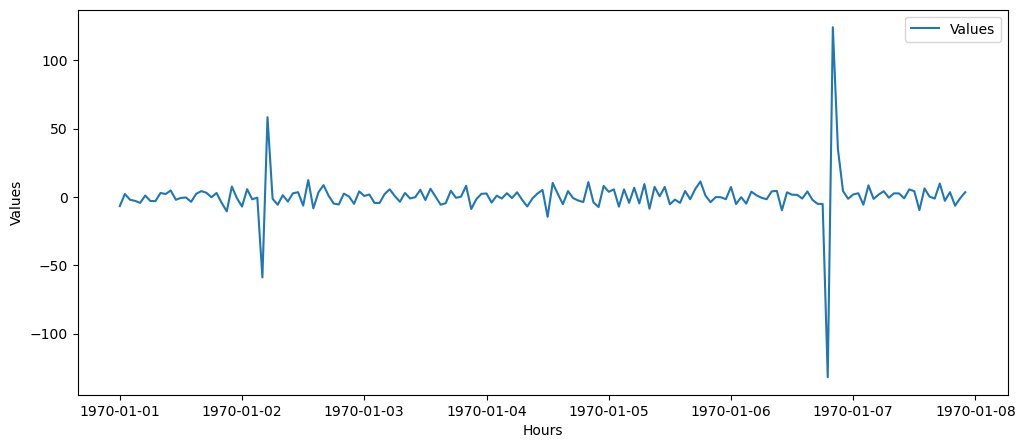

In [149]:
# set figure size 
plt.figure(figsize = (12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot() 
sns.lineplot( x = 'Time, seconds', 
             y = 'Series values, dB', 
             data = aggregated_df, 
             label = 'Values') 
  
plt.xlabel('Hours') 
  
plt.ylabel('Values')

In [144]:
# computing a 24 hours rolling average 
aggregated_df['24hour_rolling_avg'] = aggregated_df['Series values, dB'].rolling(24).mean() 
  
# viewing the dataset 
aggregated_df.iloc[:]

,"Series values, dB",24hour_rolling_avg
"Time, seconds",,
1970-01-01 00:00:00,-6.653889,NaN
1970-01-01 01:00:00,2.231389,NaN
1970-01-01 02:00:00,-1.971389,NaN
1970-01-01 03:00:00,-2.823889,NaN
1970-01-01 04:00:00,-4.300556,NaN
...,...,...
1970-01-07 18:00:00,-2.792778,2.467407
1970-01-07 19:00:00,3.550833,8.111100
1970-01-07 20:00:00,-6.374167,2.667141


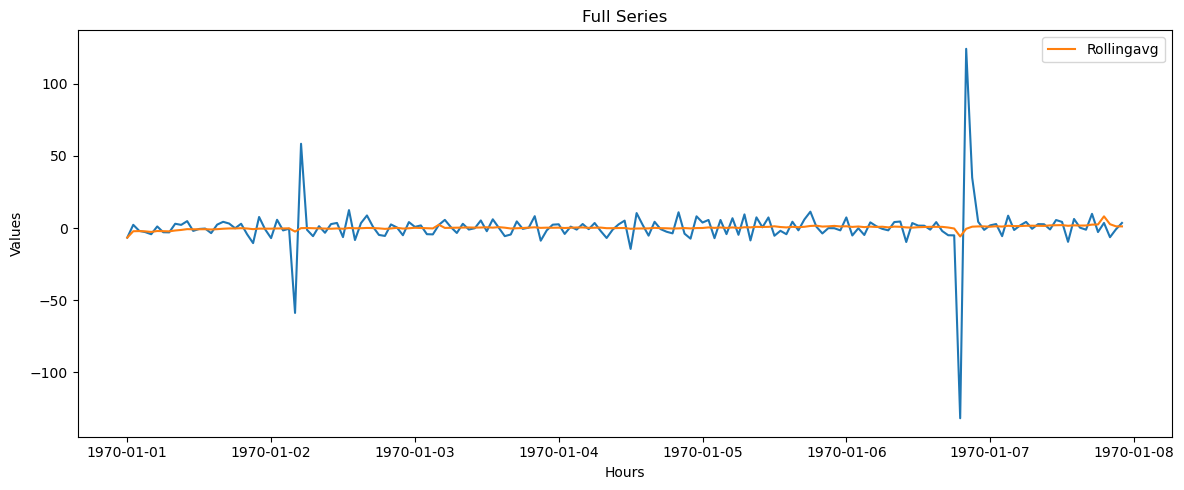

In [150]:
plt.figure( figsize = (12, 5)) 

aggregated_df['24hour_rolling_avg'] = aggregated_df['Series values, dB'].rolling(24, min_periods=1).mean()

sns.lineplot(x='Time, seconds', y='Series values, dB', data=aggregated_df)
sns.lineplot( x = 'Time, seconds', 
             y = '24hour_rolling_avg', 
             data = aggregated_df, 
             label = 'Rollingavg')
plt.title('Full Series')
plt.xlabel('Hours')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

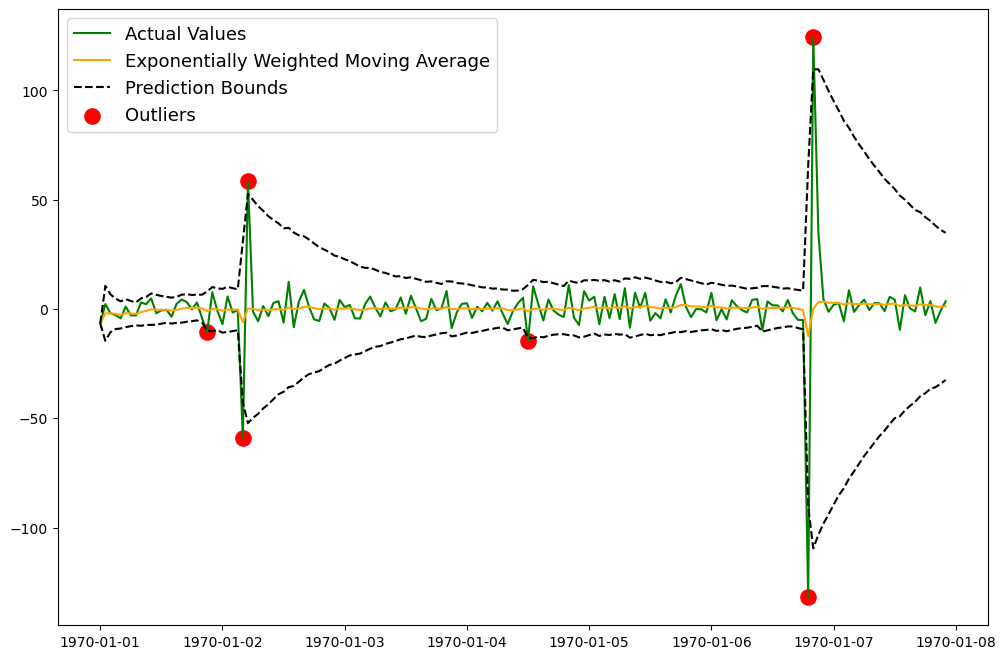

In [154]:
window_size = 10
mean = aggregated_df['Series values, dB'].ewm(window_size).mean()
std = aggregated_df['Series values, dB'].ewm(window_size).std()
std[0] = 0 #the first value turns into NaN because of no data

mean_plus_std = mean + 2*std
mean_minus_std = mean - 2*std

is_outlier = (aggregated_df['Series values, dB'] > mean_plus_std) | (aggregated_df['Series values, dB'] < mean_minus_std)
outliers = aggregated_df[is_outlier]
plt.figure(figsize=(12, 8))
plt.plot(aggregated_df['Series values, dB'], c = 'green', label = 'Actual Values')
plt.plot(mean, c = 'orange', label = 'Exponentially Weighted Moving Average')
plt.plot(mean_plus_std, 'k--', label = 'Prediction Bounds')
plt.plot(mean_minus_std, 'k--')
plt.scatter(outliers.index, outliers['Series values, dB'], c = 'r', marker = 'o', s = 120, label = 'Outliers')
plt.legend(loc="best", fontsize=13);